In [4]:
!pip install tensorlayer==1.6.0

You are using pip version 18.1, however version 20.3b1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import tensorflow as tf

/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sangqle

In [2]:
import tensorlayer as tl
import numpy as np
import os
import csv
import random
import gc
import pickle
import nibabel as nib

/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sangqle

In [3]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [6]:
###============================= SETTINGS ===================================###
DATA_SIZE = 'half' # (small, half or all)

save_dir = "/media/sangqle/BACKUP/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

HGG_data_path = "/media/sangqle/BACKUP/MICCAI_BraTS_2018_Data_Training/HGG"
LGG_data_path = "/media/sangqle/BACKUP/MICCAI_BraTS_2018_Data_Training/LGG"
survival_csv_path = "/media/sangqle/BACKUP/MICCAI_BraTS_2018_Data_Training/survival_data.csv"
###==========================================================================###

In [7]:
survival_id_list = []
survival_age_list =[]
survival_peroid_list = []

with open(survival_csv_path, 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for idx, content in enumerate(reader):
        survival_id_list.append(content[0])
        survival_age_list.append(float(content[1]))
        survival_peroid_list.append(float(content[2]))

print(len(survival_id_list)) #163

163


In [8]:
if DATA_SIZE == 'all':
    HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)
    LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)
elif DATA_SIZE == 'half':
    HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)[0:100]# DEBUG WITH SMALL DATA
    LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)[0:30] # DEBUG WITH SMALL DATA
elif DATA_SIZE == 'small':
    HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)[0:50] # DEBUG WITH SMALL DATA
    LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)[0:20] # DEBUG WITH SMALL DATA
elif DATA_SIZE == 'smallest':
    HGG_path_list = tl.files.load_folder_list(path=HGG_data_path)[0:20] # DEBUG WITH SMALL DATA
    LGG_path_list = tl.files.load_folder_list(path=LGG_data_path)[0:10] # DEBUG WITH SMALL DATA
    
else:
    exit("Unknow DATA_SIZE")
print(len(HGG_path_list), len(LGG_path_list)) #210 #75

HGG_name_list = [os.path.basename(p) for p in HGG_path_list]
LGG_name_list = [os.path.basename(p) for p in LGG_path_list]

100 30


In [9]:
len(HGG_name_list)

100

In [10]:
survival_id_from_HGG = []
survival_id_from_LGG = []
for i in survival_id_list:
    if i in HGG_name_list:
        survival_id_from_HGG.append(i)
    elif i in LGG_name_list:
        survival_id_from_LGG.append(i)
    else:
        print(i)

print(len(survival_id_from_HGG), len(survival_id_from_LGG)) #163, 0

Brats18_TCIA08_167_1
Brats18_TCIA08_242_1
Brats18_TCIA08_319_1
Brats18_TCIA08_469_1
Brats18_TCIA08_218_1
Brats18_TCIA08_406_1
Brats18_TCIA08_280_1
Brats18_TCIA08_105_1
Brats18_TCIA08_278_1
Brats18_TCIA06_247_1
Brats18_TCIA06_372_1
Brats18_TCIA06_165_1
Brats18_TCIA06_409_1
Brats18_TCIA06_184_1
Brats18_TCIA05_277_1
Brats18_TCIA05_478_1
Brats18_TCIA04_437_1
Brats18_TCIA04_192_1
Brats18_TCIA04_479_1
Brats18_TCIA04_111_1
Brats18_TCIA04_343_1
Brats18_TCIA04_149_1
Brats18_TCIA03_474_1
Brats18_TCIA03_419_1
Brats18_TCIA03_199_1
Brats18_TCIA03_296_1
Brats18_TCIA03_257_1
Brats18_TCIA03_498_1
Brats18_TCIA03_138_1
Brats18_TCIA03_338_1
Brats18_TCIA03_265_1
Brats18_TCIA03_375_1
Brats18_TCIA03_121_1
Brats18_TCIA02_274_1
Brats18_TCIA02_473_1
Brats18_TCIA02_322_1
Brats18_TCIA02_179_1
Brats18_TCIA02_368_1
Brats18_TCIA02_135_1
Brats18_TCIA02_471_1
Brats18_TCIA02_394_1
Brats18_TCIA02_300_1
Brats18_TCIA02_118_1
Brats18_TCIA02_226_1
Brats18_TCIA02_455_1
Brats18_TCIA02_283_1
Brats18_TCIA02_430_1
Brats18_TCIA0

In [11]:
len(survival_id_list)

163

In [12]:
# use 42 from 210 (in 163 subset) and 15 from 75 as 0.8/0.2 train/dev split

# use 126/42/42 from 210 (in 163 subset) and 45/15/15 from 75 as 0.6/0.2/0.2 train/dev/test split
index_HGG = list(range(0, len(survival_id_from_HGG)))
index_LGG = list(range(0, len(LGG_name_list)))
# random.shuffle(index_HGG)
# random.shuffle(index_HGG)


In [14]:
len(index_HGG)

82

In [15]:
if DATA_SIZE == 'all':
    dev_index_HGG = index_HGG[-84:-42]
    test_index_HGG = index_HGG[-42:]
    tr_index_HGG = index_HGG[:-84]
    dev_index_LGG = index_LGG[-30:-15]
    test_index_LGG = index_LGG[-15:]
    tr_index_LGG = index_LGG[:-30]
elif DATA_SIZE == 'half':
    dev_index_HGG = index_HGG[-30:]  # DEBUG WITH SMALL DATA
    test_index_HGG = index_HGG[-5:]
    tr_index_HGG = index_HGG[:-30]
    dev_index_LGG = index_LGG[-10:]  # DEBUG WITH SMALL DATA
    test_index_LGG = index_LGG[-5:]
    tr_index_LGG = index_LGG[:-10]
elif DATA_SIZE == 'small':
    dev_index_HGG = index_HGG[35:42]   # DEBUG WITH SMALL DATA
    # print(index_HGG, dev_index_HGG)
    # exit()
    test_index_HGG = index_HGG[41:42]
    tr_index_HGG = index_HGG[0:35]
    dev_index_LGG = index_LGG[7:10]    # DEBUG WITH SMALL DATA
    test_index_LGG = index_LGG[9:10]
    tr_index_LGG = index_LGG[0:7]

In [16]:
len(tr_index_HGG)

52

In [17]:
survival_id_dev_HGG = [survival_id_from_HGG[i] for i in dev_index_HGG]
survival_id_test_HGG = [survival_id_from_HGG[i] for i in test_index_HGG]
survival_id_tr_HGG = [survival_id_from_HGG[i] for i in tr_index_HGG]

survival_id_dev_LGG = [LGG_name_list[i] for i in dev_index_LGG]
survival_id_test_LGG = [LGG_name_list[i] for i in test_index_LGG]
survival_id_tr_LGG = [LGG_name_list[i] for i in tr_index_LGG]

survival_age_dev = [survival_age_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_age_test = [survival_age_list[survival_id_list.index(i)] for i in survival_id_test_HGG]
survival_age_tr = [survival_age_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

survival_period_dev = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_dev_HGG]
survival_period_test = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_test_HGG]
survival_period_tr = [survival_peroid_list[survival_id_list.index(i)] for i in survival_id_tr_HGG]

data_types = ['flair', 't1', 't1ce', 't2']
data_types_mean_std_dict = {i: {'mean': 0.0, 'std': 1.0} for i in data_types}

In [18]:
len(survival_id_dev_HGG)

30

In [19]:
# calculate mean and std for all data types

# preserving_ratio = 0.0
# preserving_ratio = 0.01 # 0.118 removed
# preserving_ratio = 0.05 # 0.213 removed
# preserving_ratio = 0.10 # 0.359 removed

#==================== LOAD ALL IMAGES' PATH AND COMPUTE MEAN/ STD
for i in data_types:
    data_temp_list = []
    for j in HGG_name_list:
        img_path = os.path.join(HGG_data_path, j, j + '_' + i + '.nii.gz')
        img = nib.load(img_path).get_data()
        data_temp_list.append(img)

    for j in LGG_name_list:
        img_path = os.path.join(LGG_data_path, j, j + '_' + i + '.nii.gz')
        img = nib.load(img_path).get_data()
        data_temp_list.append(img)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
    data_temp_list = np.asarray(data_temp_list)
    m = np.mean(data_temp_list)
    s = np.std(data_temp_list)
    data_types_mean_std_dict[i]['mean'] = m
    data_types_mean_std_dict[i]['std'] = s
del data_temp_list
print(data_types_mean_std_dict)

/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  del sys.path[0]
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


{'flair': {'mean': 55.052796611352356, 'std': 380.9875011565797}, 't1': {'mean': 71.32039103770333, 'std': 366.6561974269796}, 't1ce': {'mean': 80.16341578870278, 'std': 451.33543035257645}, 't2': {'mean': 77.49268785239178, 'std': 443.6208077152802}}


In [20]:
with open(save_dir + 'mean_std_dict_half.pkl', 'wb') as f:
    pickle.dump(data_types_mean_std_dict, f, protocol = 4)

In [21]:
data_types_mean_std_dict

{'flair': {'mean': 55.052796611352356, 'std': 380.9875011565797},
 't1': {'mean': 71.32039103770333, 'std': 366.6561974269796},
 't1ce': {'mean': 80.16341578870278, 'std': 451.33543035257645},
 't2': {'mean': 77.49268785239178, 'std': 443.6208077152802}}

In [22]:
##==================== GET NORMALIZE IMAGES
X_train_input = []
X_train_target = []
# X_train_target_whole = [] # 1 2 4
# X_train_target_core = [] # 1 4
# X_train_target_enhance = [] # 4

X_dev_input = []
X_dev_target = []
# X_dev_target_whole = [] # 1 2 4x
# X_dev_target_core = [] # 1 4
# X_dev_target_enhance = [] # 4

In [23]:
survival_id_dev_HGG

['Brats18_CBICA_AQG_1',
 'Brats18_CBICA_AQD_1',
 'Brats18_CBICA_AQA_1',
 'Brats18_CBICA_APZ_1',
 'Brats18_CBICA_APY_1',
 'Brats18_CBICA_APR_1',
 'Brats18_CBICA_AOZ_1',
 'Brats18_CBICA_AOP_1',
 'Brats18_CBICA_AOO_1',
 'Brats18_CBICA_AOH_1',
 'Brats18_CBICA_AOD_1',
 'Brats18_CBICA_ANZ_1',
 'Brats18_CBICA_ANP_1',
 'Brats18_CBICA_ANI_1',
 'Brats18_CBICA_ANG_1',
 'Brats18_CBICA_AMH_1',
 'Brats18_CBICA_AME_1',
 'Brats18_CBICA_ALX_1',
 'Brats18_CBICA_ALU_1',
 'Brats18_CBICA_ALN_1',
 'Brats18_CBICA_ABY_1',
 'Brats18_CBICA_ABO_1',
 'Brats18_CBICA_ABN_1',
 'Brats18_CBICA_ABM_1',
 'Brats18_CBICA_ABE_1',
 'Brats18_CBICA_ABB_1',
 'Brats18_CBICA_AAP_1',
 'Brats18_CBICA_AAL_1',
 'Brats18_CBICA_AAG_1',
 'Brats18_CBICA_AAB_1']

In [25]:
print(" HGG Validation")
for i in survival_id_dev_HGG:
    all_3d_data = []
    for j in data_types:
        img_path = os.path.join(HGG_data_path, i, i + '_' + j + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        # whole = np.zeros_like(seg_2d)
        # core = np.zeros_like(seg_2d)
        # enhance = np.zeros_like(seg_2d)
        # for index, x in np.ndenumerate(seg_2d):
        #     if x == 1:
        #         whole[index] = 1
        #         core[index] = 1
        #     if x == 2:
        #         whole[index] = 1
        #     if x == 4:
        #         whole[index] = 1
        #         core[index] = 1
        #         enhance[index] = 1
        # X_dev_target_whole.append(whole)
        # X_dev_target_core.append(core)
        # X_dev_target_enhance.append(enhance)
        seg_2d.astype(int)
        X_dev_target.append(seg_2d)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

 HGG Validation


/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


finished Brats18_CBICA_AQG_1
finished Brats18_CBICA_AQD_1
finished Brats18_CBICA_AQA_1
finished Brats18_CBICA_APZ_1
finished Brats18_CBICA_APY_1
finished Brats18_CBICA_APR_1
finished Brats18_CBICA_AOZ_1
finished Brats18_CBICA_AOP_1
finished Brats18_CBICA_AOO_1
finished Brats18_CBICA_AOH_1
finished Brats18_CBICA_AOD_1
finished Brats18_CBICA_ANZ_1
finished Brats18_CBICA_ANP_1
finished Brats18_CBICA_ANI_1
finished Brats18_CBICA_ANG_1
finished Brats18_CBICA_AMH_1
finished Brats18_CBICA_AME_1
finished Brats18_CBICA_ALX_1
finished Brats18_CBICA_ALU_1
finished Brats18_CBICA_ALN_1
finished Brats18_CBICA_ABY_1
finished Brats18_CBICA_ABO_1
finished Brats18_CBICA_ABN_1
finished Brats18_CBICA_ABM_1
finished Brats18_CBICA_ABE_1
finished Brats18_CBICA_ABB_1
finished Brats18_CBICA_AAP_1
finished Brats18_CBICA_AAL_1
finished Brats18_CBICA_AAG_1
finished Brats18_CBICA_AAB_1


In [26]:
len(survival_id_dev_HGG)

30

In [27]:
print(" LGG Validation")
for i in survival_id_dev_LGG:
    all_3d_data = []
    for j in data_types:
        img_path = os.path.join(LGG_data_path, i, i + '_' + j + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_dev_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        # whole = np.zeros_like(seg_2d)
        # core = np.zeros_like(seg_2d)
        # enhance = np.zeros_like(seg_2d)
        # for index, x in np.ndenumerate(seg_2d):
        #     if x == 1:
        #         whole[index] = 1
        #         core[index] = 1
        #     if x == 2:
        #         whole[index] = 1
        #     if x == 4:
        #         whole[index] = 1
        #         core[index] = 1
        #         enhance[index] = 1
        # X_dev_target_whole.append(whole)
        # X_dev_target_core.append(core)
        # X_dev_target_enhance.append(enhance)
        seg_2d.astype(int)
        X_dev_target.append(seg_2d)
    del all_3d_data
    gc.collect()
    print("finished {}".format(i))

 LGG Validation


/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


finished Brats18_TCIA10_103_1
finished Brats18_TCIA10_109_1
finished Brats18_TCIA10_130_1
finished Brats18_TCIA10_152_1
finished Brats18_TCIA10_175_1
finished Brats18_TCIA10_202_1
finished Brats18_TCIA10_241_1
finished Brats18_TCIA10_261_1
finished Brats18_TCIA10_266_1
finished Brats18_TCIA10_276_1


In [28]:
X_dev_input = np.asarray(X_dev_input, dtype=np.float32)
X_dev_target = np.asarray(X_dev_target)#, dtype=np.float32)

In [29]:
X_dev_input.shape

(6200, 240, 240, 4)

In [36]:
X_dev_target.shape

NameError: name 'X_dev_target' is not defined

In [31]:
with open(save_dir + 'train_dev_input_half.pickle', 'wb') as f:
    pickle.dump(X_dev_input, f, protocol=4)

In [32]:

with open(save_dir + 'train_dev_target_half.pickle', 'wb') as f:
    pickle.dump(X_dev_target, f, protocol=4)

In [35]:
del X_dev_input
del X_dev_target

In [33]:
print(" HGG Train")
for i in survival_id_tr_HGG:
    all_3d_data = []
    for j in data_types:
        img_path = os.path.join(HGG_data_path, i, i + '_' + j + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(HGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        # whole = np.zeros_like(seg_2d)
        # core = np.zeros_like(seg_2d)
        # enhance = np.zeros_like(seg_2d)
        # for index, x in np.ndenumerate(seg_2d):
        #     if x == 1:
        #         whole[index] = 1
        #         core[index] = 1
        #     if x == 2:
        #         whole[index] = 1
        #     if x == 4:
        #         whole[index] = 1
        #         core[index] = 1
        #         enhance[index] = 1
        # X_train_target_whole.append(whole)
        # X_train_target_core.append(core)
        # X_train_target_enhance.append(enhance)
        seg_2d.astype(int)
        X_train_target.append(seg_2d)
    del all_3d_data
    print("finished {}".format(i))
    print(len(X_train_target))

 HGG Train


/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


finished Brats18_TCIA04_361_1
155
finished Brats18_TCIA03_133_1
310
finished Brats18_TCIA02_151_1
465
finished Brats18_TCIA02_331_1
620
finished Brats18_TCIA01_231_1
775
finished Brats18_2013_11_1
930
finished Brats18_2013_27_1
1085
finished Brats18_CBICA_AZD_1
1240
finished Brats18_CBICA_AXN_1
1395
finished Brats18_CBICA_AXM_1
1550
finished Brats18_CBICA_AXL_1
1705
finished Brats18_CBICA_AXJ_1
1860
finished Brats18_CBICA_AWI_1
2015
finished Brats18_CBICA_AWH_1
2170
finished Brats18_CBICA_AWG_1
2325
finished Brats18_CBICA_AVV_1
2480
finished Brats18_CBICA_AVJ_1
2635
finished Brats18_CBICA_AVG_1
2790
finished Brats18_CBICA_AUR_1
2945
finished Brats18_CBICA_AUQ_1
3100
finished Brats18_CBICA_AUN_1
3255
finished Brats18_CBICA_ATX_1
3410
finished Brats18_CBICA_ATV_1
3565
finished Brats18_CBICA_ATP_1
3720
finished Brats18_CBICA_ATF_1
3875
finished Brats18_CBICA_ATD_1
4030
finished Brats18_CBICA_ATB_1
4185
finished Brats18_CBICA_ASY_1
4340
finished Brats18_CBICA_ASW_1
4495
finished Brats18_CB

In [34]:
print(" LGG Train")
for i in survival_id_tr_LGG:
    all_3d_data = []
    for j in data_types:
        img_path = os.path.join(LGG_data_path, i, i + '_' + j + '.nii.gz')
        img = nib.load(img_path).get_data()
        img = (img - data_types_mean_std_dict[j]['mean']) / data_types_mean_std_dict[j]['std']
        img = img.astype(np.float32)
        all_3d_data.append(img)

    seg_path = os.path.join(LGG_data_path, i, i + '_seg.nii.gz')
    seg_img = nib.load(seg_path).get_data()
    seg_img = np.transpose(seg_img, (1, 0, 2))
    for j in range(all_3d_data[0].shape[2]):
        combined_array = np.stack((all_3d_data[0][:, :, j], all_3d_data[1][:, :, j], all_3d_data[2][:, :, j], all_3d_data[3][:, :, j]), axis=2)
        combined_array = np.transpose(combined_array, (1, 0, 2))#.tolist()
        combined_array.astype(np.float32)
        X_train_input.append(combined_array)

        seg_2d = seg_img[:, :, j]
        # whole = np.zeros_like(seg_2d)
        # core = np.zeros_like(seg_2d)
        # enhance = np.zeros_like(seg_2d)
        # for index, x in np.ndenumerate(seg_2d):
        #     if x == 1:
        #         whole[index] = 1
        #         core[index] = 1
        #     if x == 2:
        #         whole[index] = 1
        #     if x == 4:
        #         whole[index] = 1
        #         core[index] = 1
        #         enhance[index] = 1
        # X_train_target_whole.append(whole)
        # X_train_target_core.append(core)
        # X_train_target_enhance.append(enhance)
        seg_2d.astype(int)
        X_train_target.append(seg_2d)
    del all_3d_data
    print("finished {}".format(i))

 LGG Train


/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


finished Brats18_2013_0_1
finished Brats18_2013_15_1
finished Brats18_2013_16_1
finished Brats18_2013_1_1
finished Brats18_2013_24_1
finished Brats18_2013_28_1
finished Brats18_2013_29_1
finished Brats18_2013_6_1
finished Brats18_2013_8_1
finished Brats18_2013_9_1
finished Brats18_TCIA09_141_1
finished Brats18_TCIA09_177_1
finished Brats18_TCIA09_254_1
finished Brats18_TCIA09_255_1
finished Brats18_TCIA09_312_1
finished Brats18_TCIA09_402_1
finished Brats18_TCIA09_451_1
finished Brats18_TCIA09_462_1
finished Brats18_TCIA09_493_1
finished Brats18_TCIA09_620_1


In [32]:
X_train_input = np.asarray(X_train_input, dtype=np.float32)
X_train_target = np.asarray(X_train_target)#, dtype=np.float32)

In [37]:
X_train_input = np.asarray(X_train_input, dtype=np.float32)

In [38]:
X_train_input.shape

(11160, 240, 240, 4)

In [ ]:
with open(save_dir + 'train_input_half.pickle', 'wb') as f:
    pickle.dump(X_train_input, f, protocol=4)

In [ ]:
with open(save_dir + 'train_target.pickle', 'wb') as f:
    pickle.dump(X_train_target, f, protocol=4)

In [77]:
x1 = X_train_input[100]

In [78]:
img = x1[:,:,0]

In [79]:
img.shape

(240, 240)

In [65]:
import matplotlib.pyplot as plt

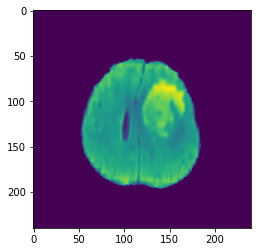

In [80]:
plt.imshow(img)

In [81]:
y1 = X_train_target[100]
# seg = y1[:,:,0]
# plt.imshow(seg)

In [75]:
y1.shape

(240, 240)

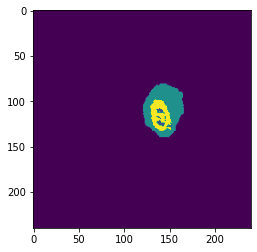

In [82]:
plt.imshow(y1)

In [71]:
X_train_target.shape


(5115, 240, 240)

In [36]:
import tensorflow as tf
import tensorlayer as tl
from tensorlayer.layers import *
import numpy as np


from tensorlayer.layers import *

def u_net(x, is_train=False, reuse=False, n_out=1):
    _, nx, ny, nz = x.get_shape().as_list()
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')
        conv1 = Conv2d(inputs, 64, (3, 3), act=tf.nn.relu, name='conv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='conv1_2')
        pool1 = MaxPool2d(conv1, (2, 2), name='pool1')
        conv2 = Conv2d(pool1, 128, (3, 3), act=tf.nn.relu, name='conv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='conv2_2')
        pool2 = MaxPool2d(conv2, (2, 2), name='pool2')
        conv3 = Conv2d(pool2, 256, (3, 3), act=tf.nn.relu, name='conv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='conv3_2')
        pool3 = MaxPool2d(conv3, (2, 2), name='pool3')
        conv4 = Conv2d(pool3, 512, (3, 3), act=tf.nn.relu, name='conv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='conv4_2')
        pool4 = MaxPool2d(conv4, (2, 2), name='pool4')
        conv5 = Conv2d(pool4, 1024, (3, 3), act=tf.nn.relu, name='conv5_1')
        conv5 = Conv2d(conv5, 1024, (3, 3), act=tf.nn.relu, name='conv5_2')

        up4 = DeConv2d(conv5, 512, (3, 3), (nx/8, ny/8), (2, 2), name='deconv4')
        up4 = ConcatLayer([up4, conv4], 3, name='concat4')
        conv4 = Conv2d(up4, 512, (3, 3), act=tf.nn.relu, name='uconv4_1')
        conv4 = Conv2d(conv4, 512, (3, 3), act=tf.nn.relu, name='uconv4_2')
        up3 = DeConv2d(conv4, 256, (3, 3), (nx/4, ny/4), (2, 2), name='deconv3')
        up3 = ConcatLayer([up3, conv3], 3, name='concat3')
        conv3 = Conv2d(up3, 256, (3, 3), act=tf.nn.relu, name='uconv3_1')
        conv3 = Conv2d(conv3, 256, (3, 3), act=tf.nn.relu, name='uconv3_2')
        up2 = DeConv2d(conv3, 128, (3, 3), (nx/2, ny/2), (2, 2), name='deconv2')
        up2 = ConcatLayer([up2, conv2], 3, name='concat2')
        conv2 = Conv2d(up2, 128, (3, 3), act=tf.nn.relu,  name='uconv2_1')
        conv2 = Conv2d(conv2, 128, (3, 3), act=tf.nn.relu, name='uconv2_2')
        up1 = DeConv2d(conv2, 64, (3, 3), (nx/1, ny/1), (2, 2), name='deconv1')
        up1 = ConcatLayer([up1, conv1] , 3, name='concat1')
        conv1 = Conv2d(up1, 64, (3, 3), act=tf.nn.relu, name='uconv1_1')
        conv1 = Conv2d(conv1, 64, (3, 3), act=tf.nn.relu, name='uconv1_2')
        conv1 = Conv2d(conv1, n_out, (1, 1), act=tf.nn.sigmoid, name='uconv1')
    return conv1

def u_net_bn(x, is_train=False, reuse=False, batch_size=None, pad='SAME', n_out=1):
    """image to image translation via conditional adversarial learning"""
    nx = int(x._shape[1])
    ny = int(x._shape[2])
    nz = int(x._shape[3])
    print(" * Input: size of image: %d %d %d" % (nx, ny, nz))

    w_init = tf.truncated_normal_initializer(stddev=0.01)
    b_init = tf.constant_initializer(value=0.0)
    gamma_init=tf.random_normal_initializer(1., 0.02)
    with tf.variable_scope("u_net", reuse=reuse):
        tl.layers.set_name_reuse(reuse)
        inputs = InputLayer(x, name='inputs')

        conv1 = Conv2d(inputs, 64, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv1')
        conv2 = Conv2d(conv1, 128, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv2')
        conv2 = BatchNormLayer(conv2, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn2')

        conv3 = Conv2d(conv2, 256, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv3')
        conv3 = BatchNormLayer(conv3, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn3')

        conv4 = Conv2d(conv3, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv4')
        conv4 = BatchNormLayer(conv4, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn4')

        conv5 = Conv2d(conv4, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv5')
        conv5 = BatchNormLayer(conv5, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn5')

        conv6 = Conv2d(conv5, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv6')
        conv6 = BatchNormLayer(conv6, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn6')

        conv7 = Conv2d(conv6, 512, (4, 4), (2, 2), act=None, padding=pad, W_init=w_init, b_init=b_init, name='conv7')
        conv7 = BatchNormLayer(conv7, act=lambda x: tl.act.lrelu(x, 0.2), is_train=is_train, gamma_init=gamma_init, name='bn7')

        conv8 = Conv2d(conv7, 512, (4, 4), (2, 2), act=lambda x: tl.act.lrelu(x, 0.2), padding=pad, W_init=w_init, b_init=b_init, name='conv8')
        print(" * After conv: %s" % conv8.outputs)
        # exit()
        # print(nx/8)
        up7 = DeConv2d(conv8, 512, (4, 4), out_size=(2, 2), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv7')
        up7 = BatchNormLayer(up7, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn7')

        # print(up6.outputs)
        up6 = ConcatLayer([up7, conv7], concat_dim=3, name='concat6')
        up6 = DeConv2d(up6, 1024, (4, 4), out_size=(4, 4), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv6')
        up6 = BatchNormLayer(up6, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn6')
        # print(up6.outputs)
        # exit()

        up5 = ConcatLayer([up6, conv6], concat_dim=3, name='concat5')
        up5 = DeConv2d(up5, 1024, (4, 4), out_size=(8, 8), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv5')
        up5 = BatchNormLayer(up5, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn5')
        # print(up5.outputs)
        # exit()

        up4 = ConcatLayer([up5, conv5] ,concat_dim=3, name='concat4')
        up4 = DeConv2d(up4, 1024, (4, 4), out_size=(15, 15), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv4')
        up4 = BatchNormLayer(up4, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn4')

        up3 = ConcatLayer([up4, conv4] ,concat_dim=3, name='concat3')
        up3 = DeConv2d(up3, 256, (4, 4), out_size=(30, 30), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv3')
        up3 = BatchNormLayer(up3, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn3')

        up2 = ConcatLayer([up3, conv3] ,concat_dim=3, name='concat2')
        up2 = DeConv2d(up2, 128, (4, 4), out_size=(60, 60), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv2')
        up2 = BatchNormLayer(up2, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn2')

        up1 = ConcatLayer([up2, conv2] ,concat_dim=3, name='concat1')
        up1 = DeConv2d(up1, 64, (4, 4), out_size=(120, 120), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv1')
        up1 = BatchNormLayer(up1, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn1')

        up0 = ConcatLayer([up1, conv1] ,concat_dim=3, name='concat0')
        up0 = DeConv2d(up0, 64, (4, 4), out_size=(240, 240), strides=(2, 2),
                                    padding=pad, act=None, batch_size=batch_size, W_init=w_init, b_init=b_init, name='deconv0')
        up0 = BatchNormLayer(up0, act=tf.nn.relu, is_train=is_train, gamma_init=gamma_init, name='dbn0')
        # print(up0.outputs)
        # exit()

        out = Conv2d(up0, n_out, (1, 1), act=tf.nn.sigmoid, name='out')

        print(" * Output: %s" % out.outputs)
        # exit()

    return out


In [37]:
def distort_imgs(data):
    """ data augumentation """
    x1, x2, x3, x4, y = data
    # x1, x2, x3, x4, y = tl.prepro.flip_axis_multi([x1, x2, x3, x4, y],  # previous without this, hard-dice=83.7
    #                         axis=0, is_random=True) # up down
    x1, x2, x3, x4, y = tl.prepro.flip_axis_multi([x1, x2, x3, x4, y],
                            axis=1, is_random=True) # left right
    x1, x2, x3, x4, y = tl.prepro.elastic_transform_multi([x1, x2, x3, x4, y],
                            alpha=720, sigma=24, is_random=True)
    x1, x2, x3, x4, y = tl.prepro.rotation_multi([x1, x2, x3, x4, y], rg=20,
                            is_random=True, fill_mode='constant') # nearest, constant
    x1, x2, x3, x4, y = tl.prepro.shift_multi([x1, x2, x3, x4, y], wrg=0.10,
                            hrg=0.10, is_random=True, fill_mode='constant')
    x1, x2, x3, x4, y = tl.prepro.shear_multi([x1, x2, x3, x4, y], 0.05,
                            is_random=True, fill_mode='constant')
    x1, x2, x3, x4, y = tl.prepro.zoom_multi([x1, x2, x3, x4, y],
                            zoom_range=[0.9, 1.1], is_random=True,
                            fill_mode='constant')
    return x1, x2, x3, x4, y

In [38]:
def vis_imgs(X, y, path):
    """ show one slice """
    if y.ndim == 2:
        y = y[:,:,np.newaxis]
    assert X.ndim == 3
    tl.vis.save_images(np.asarray([X[:,:,0,np.newaxis],
        X[:,:,1,np.newaxis], X[:,:,2,np.newaxis],
        X[:,:,3,np.newaxis], y]), size=(1, 5),
        image_path=path)

def vis_imgs2(X, y_, y, path):
    """ show one slice with target """
    if y.ndim == 2:
        y = y[:,:,np.newaxis]
    if y_.ndim == 2:
        y_ = y_[:,:,np.newaxis]
    assert X.ndim == 3
    tl.vis.save_images(np.asarray([X[:,:,0,np.newaxis],
        X[:,:,1,np.newaxis], X[:,:,2,np.newaxis],
        X[:,:,3,np.newaxis], y_, y]), size=(1, 6),
        image_path=path)

In [39]:
def main(task='all'):
    ## Create folder to save trained model and result images
    save_dir = "checkpoint"
    tl.files.exists_or_mkdir(save_dir)
    tl.files.exists_or_mkdir("samples/{}".format(task))

    ###======================== LOAD DATA ===================================###
    ## by importing this, you can load a training set and a validation set.
    # you will get X_train_input, X_train_target, X_dev_input and X_dev_target
    # there are 4 labels in targets:
    # Label 0: background
    # Label 1: necrotic and non-enhancing tumor
    # Label 2: edema
    # Label 4: enhancing tumor
#     import prepare_data_with_valid as dataset
    X_train = X_train_input
    y_train = X_train_target[:,:,:,np.newaxis]
    X_test = X_dev_input
    y_test = X_dev_target[:,:,:,np.newaxis]

    if task == 'all':
        y_train = (y_train > 0).astype(int)
        y_test = (y_test > 0).astype(int)
    elif task == 'necrotic':
        y_train = (y_train == 1).astype(int)
        y_test = (y_test == 1).astype(int)
    elif task == 'edema':
        y_train = (y_train == 2).astype(int)
        y_test = (y_test == 2).astype(int)
    elif task == 'enhance':
        y_train = (y_train == 4).astype(int)
        y_test = (y_test == 4).astype(int)
    else:
        exit("Unknow task %s" % task)

    ###======================== HYPER-PARAMETERS ============================###
    batch_size = 10
    lr = 0.0001 
    # lr_decay = 0.5
    # decay_every = 100
    beta1 = 0.9
    n_epoch = 100
    print_freq_step = 100

    ###======================== SHOW DATA ===================================###
    # show one slice
    X = np.asarray(X_train[80])
    y = np.asarray(y_train[80])
    # print(X.shape, X.min(), X.max()) # (240, 240, 4) -0.380588 2.62761
    # print(y.shape, y.min(), y.max()) # (240, 240, 1) 0 1
    nw, nh, nz = X.shape
#     vis_imgs(X, y, 'samples/{}/_train_im.png'.format(task))
    # show data augumentation results
    for i in range(10):
        x_flair, x_t1, x_t1ce, x_t2, label = distort_imgs([X[:,:,0,np.newaxis], X[:,:,1,np.newaxis],
                X[:,:,2,np.newaxis], X[:,:,3,np.newaxis], y])#[:,:,np.newaxis]])
        # print(x_flair.shape, x_t1.shape, x_t1ce.shape, x_t2.shape, label.shape) # (240, 240, 1) (240, 240, 1) (240, 240, 1) (240, 240, 1) (240, 240, 1)
        X_dis = np.concatenate((x_flair, x_t1, x_t1ce, x_t2), axis=2)
        # print(X_dis.shape, X_dis.min(), X_dis.max()) # (240, 240, 4) -0.380588233471 2.62376139209
#         vis_imgs(X_dis, label, 'samples/{}/_train_im_aug{}.png'.format(task, i))

    with tf.device('/cpu:0'):
        sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True))
        with tf.device('/gpu:0'): #<- remove it if you train on CPU or other GPU
            ###======================== DEFIINE MODEL =======================###
            ## nz is 4 as we input all Flair, T1, T1c and T2.
            t_image = tf.placeholder('float32', [batch_size, nw, nh, nz], name='input_image')
            ## labels are either 0 or 1
            t_seg = tf.placeholder('float32', [batch_size, nw, nh, 1], name='target_segment')
            ## train inference
            net = u_net(t_image, is_train=True, reuse=False, n_out=1)
            ## test inference
            net_test = u_net(t_image, is_train=False, reuse=True, n_out=1)

            ###======================== DEFINE LOSS =========================###
            ## train losses
            out_seg = net.outputs
            dice_loss = 1 - tl.cost.dice_coe(out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
            iou_loss = tl.cost.iou_coe(out_seg, t_seg, axis=[0,1,2,3])
            dice_hard = tl.cost.dice_hard_coe(out_seg, t_seg, axis=[0,1,2,3])
            loss = dice_loss

            ## test losses
            test_out_seg = net_test.outputs
            test_dice_loss = 1 - tl.cost.dice_coe(test_out_seg, t_seg, axis=[0,1,2,3])#, 'jaccard', epsilon=1e-5)
            test_iou_loss = tl.cost.iou_coe(test_out_seg, t_seg, axis=[0,1,2,3])
            test_dice_hard = tl.cost.dice_hard_coe(test_out_seg, t_seg, axis=[0,1,2,3])

        ###======================== DEFINE TRAIN OPTS =======================###
        t_vars = tl.layers.get_variables_with_name('u_net', True, True)
        with tf.device('/gpu:0'):
            with tf.variable_scope('learning_rate'):
                lr_v = tf.Variable(lr, trainable=False)
            train_op = tf.train.AdamOptimizer(lr_v, beta1=beta1).minimize(loss, var_list=t_vars)

        ###======================== LOAD MODEL ==============================###
#         tl.layers.initialize_global_variables(sess)
#         ## load existing model if possible
#         tl.files.load_and_assign_npz(sess=sess, name=save_dir+'/u_net_{}.npz'.format(task), network=net)

        ###======================== TRAINING ================================###
    for epoch in range(0, n_epoch+1):
        epoch_time = time.time()
        ## update decay learning rate at the beginning of a epoch
        # if epoch !=0 and (epoch % decay_every == 0):
        #     new_lr_decay = lr_decay ** (epoch // decay_every)
        #     sess.run(tf.assign(lr_v, lr * new_lr_decay))
        #     log = " ** new learning rate: %f" % (lr * new_lr_decay)
        #     print(log)
        # elif epoch == 0:
        #     sess.run(tf.assign(lr_v, lr))
        #     log = " ** init lr: %f  decay_every_epoch: %d, lr_decay: %f" % (lr, decay_every, lr_decay)
        #     print(log)

        total_dice, total_iou, total_dice_hard, n_batch = 0, 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_train, targets=y_train,
                                    batch_size=batch_size, shuffle=True):
            images, labels = batch
            step_time = time.time()
            ## data augumentation for a batch of Flair, T1, T1c, T2 images
            # and label maps synchronously.
            data = tl.prepro.threading_data([_ for _ in zip(images[:,:,:,0, np.newaxis],
                    images[:,:,:,1, np.newaxis], images[:,:,:,2, np.newaxis],
                    images[:,:,:,3, np.newaxis], labels)],
                    fn=distort_imgs) # (10, 5, 240, 240, 1)
            b_images = data[:,0:4,:,:,:]  # (10, 4, 240, 240, 1)
            b_labels = data[:,4,:,:,:]
            b_images = b_images.transpose((0,2,3,1,4))
            b_images.shape = (batch_size, nw, nh, nz)

            ## update network
            _, _dice, _iou, _diceh, out = sess.run([train_op,
                    dice_loss, iou_loss, dice_hard, net.outputs],
                    {t_image: b_images, t_seg: b_labels})
            total_dice += _dice; total_iou += _iou; total_dice_hard += _diceh
            n_batch += 1

            ## you can show the predition here:
            # vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_tmp.png".format(task))
            # exit()

            # if _dice == 1: # DEBUG
            #     print("DEBUG")
            #     vis_imgs2(b_images[0], b_labels[0], out[0], "samples/{}/_debug.png".format(task))

            if n_batch % print_freq_step == 0:
                print("Epoch %d step %d 1-dice: %f hard-dice: %f iou: %f took %fs (2d with distortion)"
                % (epoch, n_batch, _dice, _diceh, _iou, time.time()-step_time))

            ## check model fail
            if np.isnan(_dice):
                exit(" ** NaN loss found during training, stop training")
            if np.isnan(out).any():
                exit(" ** NaN found in output images during training, stop training")

        print(" ** Epoch [%d/%d] train 1-dice: %f hard-dice: %f iou: %f took %fs (2d with distortion)" %
                (epoch, n_epoch, total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch, time.time()-epoch_time))

        ## save a predition of training set
        for i in range(batch_size):
            if np.max(b_images[i]) > 0:
                vis_imgs2(b_images[i], b_labels[i], out[i], "samples/{}/train_{}.png".format(task, epoch))
                break
            elif i == batch_size-1:
                vis_imgs2(b_images[i], b_labels[i], out[i], "samples/{}/train_{}.png".format(task, epoch))

        ###======================== EVALUATION ==========================###
        total_dice, total_iou, total_dice_hard, n_batch = 0, 0, 0, 0
        for batch in tl.iterate.minibatches(inputs=X_test, targets=y_test,
                                        batch_size=batch_size, shuffle=True):
            b_images, b_labels = batch
            _dice, _iou, _diceh, out = sess.run([test_dice_loss,
                    test_iou_loss, test_dice_hard, net_test.outputs],
                    {t_image: b_images, t_seg: b_labels})
            total_dice += _dice; total_iou += _iou; total_dice_hard += _diceh
            n_batch += 1

        print(" **"+" "*17+"test 1-dice: %f hard-dice: %f iou: %f (2d no distortion)" %
                (total_dice/n_batch, total_dice_hard/n_batch, total_iou/n_batch))
        print(" task: {}".format(task))
        ## save a predition of test set
        for i in range(batch_size):
            if np.max(b_images[i]) > 0:
                vis_imgs2(b_images[i], b_labels[i], out[i], "samples/{}/test_{}.png".format(task, epoch))
                break
            elif i == batch_size-1:
                vis_imgs2(b_images[i], b_labels[i], out[i], "samples/{}/test_{}.png".format(task, epoch))

        ###======================== SAVE MODEL ==========================###
        tl.files.save_npz(net.all_params, name=save_dir+'/u_net_{}.npz'.format(task), sess=sess)

In [40]:
main()

[!] checkpoint exists ...
[!] samples/all exists ...
  [TL] InputLayer  u_net/inputs: (10, 240, 240, 4)
  [TL] Conv2dLayer u_net/conv1_1: shape:[3, 3, 4, 64] strides:[1, 1, 1, 1] pad:SAME act:relu
Instructions for updating:
Colocations handled automatically by placer.
  [TL] Conv2dLayer u_net/conv1_2: shape:[3, 3, 64, 64] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] PoolLayer   u_net/pool1: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] Conv2dLayer u_net/conv2_1: shape:[3, 3, 64, 128] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] Conv2dLayer u_net/conv2_2: shape:[3, 3, 128, 128] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] PoolLayer   u_net/pool2: ksize:[1, 2, 2, 1] strides:[1, 2, 2, 1] padding:SAME pool:max_pool
  [TL] Conv2dLayer u_net/conv3_1: shape:[3, 3, 128, 256] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] Conv2dLayer u_net/conv3_2: shape:[3, 3, 256, 256] strides:[1, 1, 1, 1] pad:SAME act:relu
  [TL] PoolLayer   u_net/pool3: ksize:[1, 2, 2, 1] strid

FailedPreconditionError: Attempting to use uninitialized value u_net/uconv1/b_conv2d
	 [[node u_net/uconv1/b_conv2d/read (defined at /home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorlayer/layers.py:1282) ]]

Caused by op 'u_net/uconv1/b_conv2d/read', defined at:
  File "/home/sangqle/.pyenv/versions/3.6.9/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sangqle/.pyenv/versions/3.6.9/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "/home/sangqle/.pyenv/versions/3.6.9/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/home/sangqle/.pyenv/versions/3.6.9/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/home/sangqle/.pyenv/versions/3.6.9/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/ioloop.py", line 688, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/ioloop.py", line 741, in _run_callback
    ret = callback()
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 814, in inner
    self.ctx_run(self.run)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 775, in run
    yielded = self.gen.send(value)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 234, in wrapper
    yielded = ctx_run(next, result)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tornado/gen.py", line 162, in _fake_ctx_run
    return f(*args, **kw)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-263240bbee7e>", line 1, in <module>
    main()
  File "<ipython-input-39-76774485ab43>", line 71, in main
    net = u_net(t_image, is_train=True, reuse=False, n_out=1)
  File "<ipython-input-36-197278fb7f2f>", line 45, in u_net
    conv1 = Conv2d(conv1, n_out, (1, 1), act=tf.nn.sigmoid, name='uconv1')
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorlayer/layers.py", line 1939, in Conv2d
    name = name)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorlayer/layers.py", line 1282, in __init__
    b = tf.get_variable(name='b_conv2d', shape=(shape[-1]), initializer=b_init, **b_init_args )
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1479, in get_variable
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1220, in get_variable
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 547, in get_variable
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 499, in _true_getter
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 911, in _get_single_variable
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1395, in __init__
    constraint=constraint)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3890, in identity
    "Identity", input=input, name=name)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value u_net/uconv1/b_conv2d
	 [[node u_net/uconv1/b_conv2d/read (defined at /home/sangqle/.pyenv/versions/3.6.9/envs/unet/lib/python3.6/site-packages/tensorlayer/layers.py:1282) ]]
